#**Regression & Its Evaluation**


1. What is Simple Linear Regression?
    - Simple Linear Regression is a statistical technique that models the linear relationship between a dependent variable (Y) and a single independent variable (X). The goal is to find a straight line (regression line) that best fits the data points, predicting Y from X using the equation:
     Y=β0+β1X+ϵ
     where β0 is the intercept,β1is the slope, and ϵ is the error term.

2. What are the key assumptions of Simple Linear Regression?
    - Linearity: The relationship between X and Y is linear.

    - Independence: Observations are independent of each other.

    - Homoscedasticity: The variance of residuals (errors) is constant across all levels of X.

    - Normality: Residuals are normally distributed.

    - No multicollinearity: Not applicable for single predictor (applies to multiple regression).

3. What is heteroscedasticity, and why is it important to address in regression models?
    - Heteroscedasticity occurs when the variance of residuals is not constant across all levels of the independent variable. This violates regression assumptions and can lead to inefficient estimates and incorrect inference, making hypothesis tests unreliable. Addressing it ensures more robust, trustworthy models.

4.  What is Multiple Linear Regression?
    - Multiple Linear Regression is an extension of simple linear regression that models the relationship between a dependent variable and two or more independent variables. The equation is:
  Y=β0 +β1X1 +β2X2+⋯+βnXn+ϵ
  This allows for more complex modeling and improved predictions.

5. What is polynomial regression, and how does it differ from linear
regression?
    - Polynomial regression fits a curve to data by modeling the relationship as an nth-degree polynomial rather than a straight line. For example, a quadratic model:
     Y= β0+ β1X + β2X2 + ϵ
     It differs from linear regression as it can capture non-linear relationships.


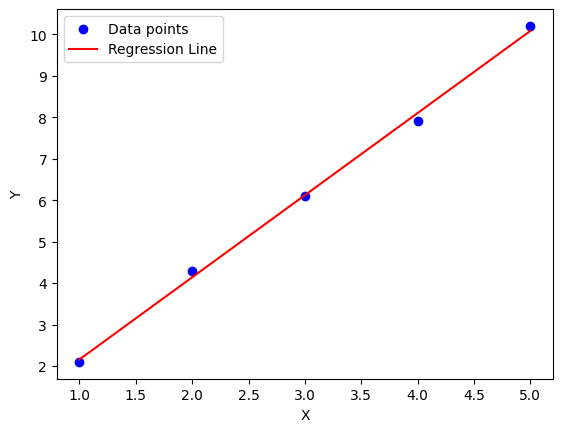

In [5]:
# 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5]
# Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [6]:
# 7.  Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000]
# Rooms = [2, 3, 3, 4]
# Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.


import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# VIF Calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


# Check VIF values; if VIF > 5 or 10, high multicollinearity exists.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 07 Nov 2025   Prob (F-statistic):             0.0377
Time:                        12:06:06   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


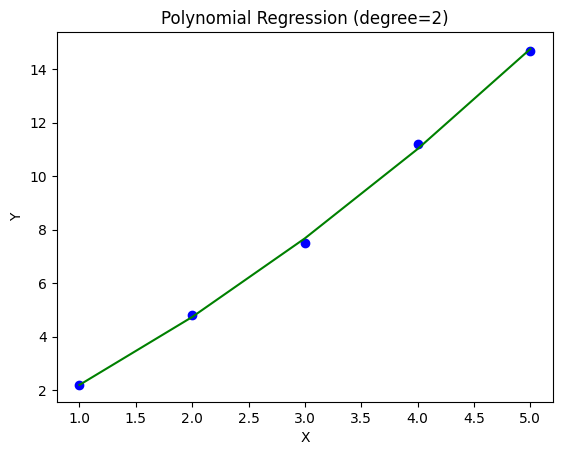

In [7]:
# 8. Implement polynomial regression on the following data:
# X = [1, 2, 3, 4, 5]
# Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (degree=2)')
plt.show()

# This fits a 2nd-degree polynomial and plots the curve.

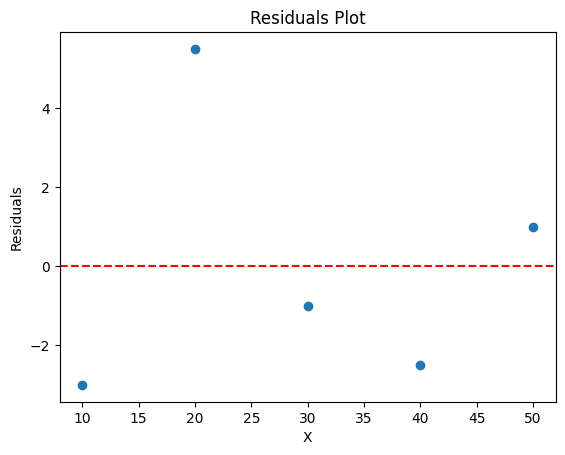

In [8]:
# 9. Create a residuals plot for a regression model trained on this data:
# X = [10, 20, 30, 40, 50]
# Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


# If residuals spread increases/decreases with X, heteroscedasticity is present.


10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

    - Heteroscedasticity:Apply transformations to dependent variable (e.g., log transform).Use robust standard errors.Check residuals plot to validate corrections.

    - Multicollinearity:Check VIF values and remove/reduce highly correlated features.Combine correlated variables or use dimensionality reduction techniques.

    - General Steps:Validate model assumptions with diagnostics.Retrain model after addressing violations.Interpret results carefully to ensure robustness.
